In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

In [44]:
df = pd.read_csv('permutation.csv')
df.head(5)

,Value,Region,Type
0,NaN,before_TP,Actual
1,1.000000,after_TP,Actual
2,0.000000,across_TP,Actual
3,0.712168,before_TP,Permuted
4,0.916667,after_TP,Permuted


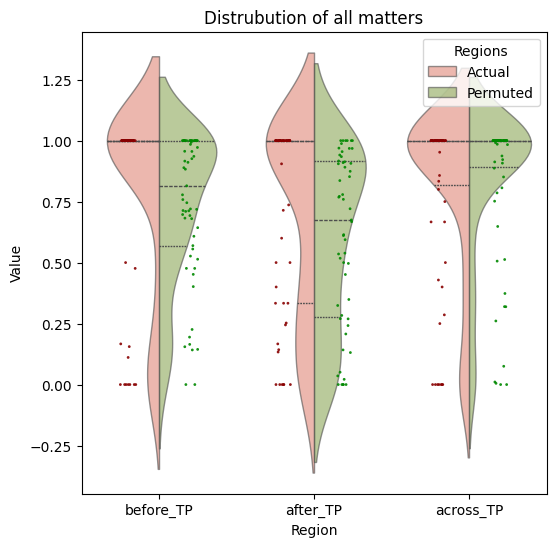

In [45]:
plt.figure(figsize=(6, 6))

sns.violinplot(data=df, x="Region", y="Value", hue="Type", palette=["#F17C67", "#90B44B"], alpha=0.6, 
               split=True, inner="quart", linewidth=1, density_norm="count")

ax = sns.stripplot(data=df, x="Region", y="Value", hue="Type",
              dodge=True, alpha=0.9, jitter=True, palette=["#880000", "#008800"], size=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Regions')

plt.title('Distrubution of all matters')
plt.show()

In [46]:
data1 = df[(df['Type'] == 'Actual') & (df['Region'] == 'after_TP')]['Value']
data2 = df[(df['Type'] == 'Actual') & (df['Region'] == 'across_TP')]['Value']
data1 = data1.dropna()
data2 = data2.dropna()
data1.size

49

In [47]:
statistic, p_value = ks_2samp(data1, data2)

print(f"K-S: {statistic}")
print(f"p: {p_value}")

K-S: 0.18594104308390022
p: 0.25948635120998237


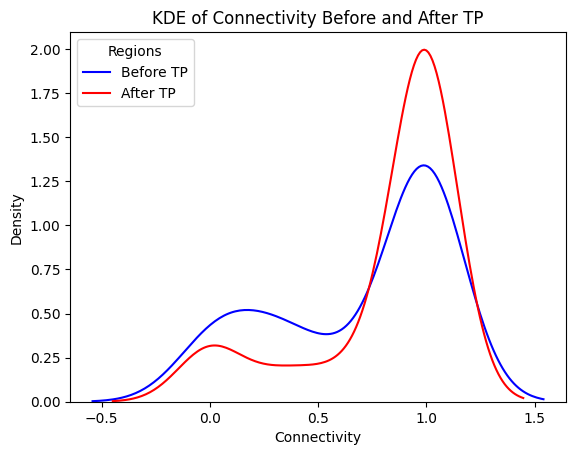

In [48]:
# 绘制data1和data2的KDE图
sns.kdeplot(data1, color="blue", label="Before TP")
sns.kdeplot(data2, color="red", label="After TP")

plt.legend(title="Regions")
plt.xlabel("Connectivity")
plt.ylabel("Density")
plt.title("KDE of Connectivity Before and After TP")
plt.show()


In [49]:
df_difference = pd.read_csv('difference.csv')
df_difference.head(5)


,difference,Type
0,NaN,actual
1,1.0,actual
2,0.5,actual
3,NaN,actual
4,NaN,actual


C:\Users\75766\AppData\Local\Temp\ipykernel_3932\886464225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.boxplot(data=df_difference, x="Type", y="difference", palette=["#F17C67", "#90B44B"],
C:\Users\75766\AppData\Local\Temp\ipykernel_3932\886464225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data=df_difference, x="Type", y="difference",


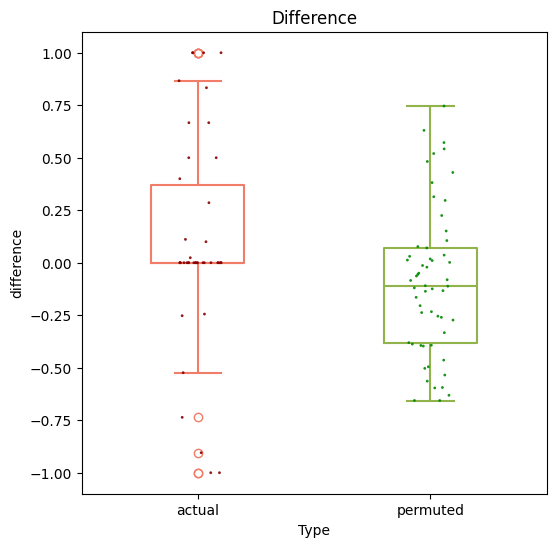

outcome


In [50]:
plt.figure(figsize=(6, 6))
bx = sns.boxplot(data=df_difference, x="Type", y="difference", palette=["#F17C67", "#90B44B"], 
               width=0.4, fill=False)

ax = sns.stripplot(data=df_difference, x="Type", y="difference",
                alpha=0.9, jitter=True, palette=["#880000", "#008800"], size=2)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:2], labels[:2], title='Type')

plt.title('Difference')
plt.show() 
print("outcome")